In [1]:
import pickle
import os
import matplotlib.pyplot as plt
os.chdir("..")

In [2]:
os.getcwd()

'C:\\Users\\Dongmin Kim\\Documents\\DeepTSAD'

## Load

In [3]:
from data.load_data import DataFactory

In [4]:
datafactory = DataFactory()

In [6]:
train_X, train_y, test_X, test_y = datafactory.load_SMAP()

Reading SMAP...
train: X - (135183, 25), y - (135183,)
test: X - (427617, 25), y - (427617,)
Loading complete.


## Stats

In [7]:
import numpy as np

In [9]:
print("=== statistics ===")
train_len, F = train_X.shape
test_len, _ = test_X.shape
anomaly_count = np.count_nonzero(test_y)
print(f"[Train] total: {train_len}, num_features: {F}")
print(f"[Test] total: {test_len}, anomaly / total: {anomaly_count}/{len(test_y)} = {anomaly_count/len(test_y):.3f}")

=== statistics ===
[Train] total: 135183, num_features: 25
[Test] total: 427617, anomaly / total: 54696/427617 = 0.128


## Visualize

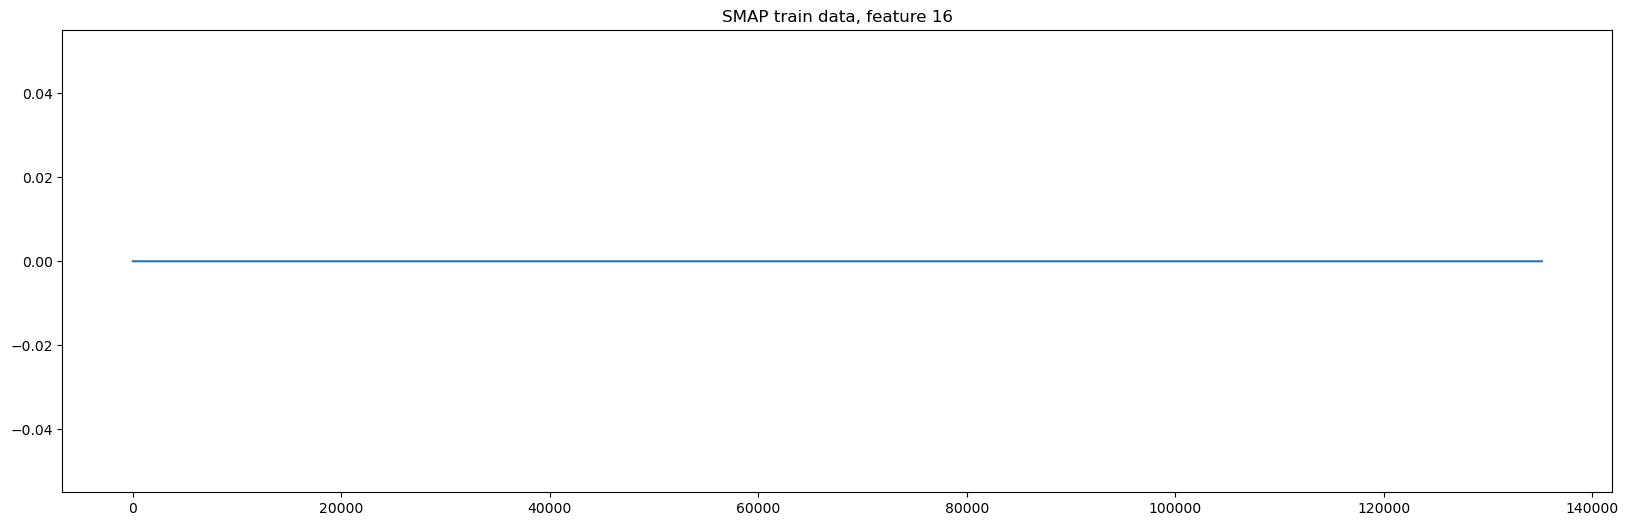

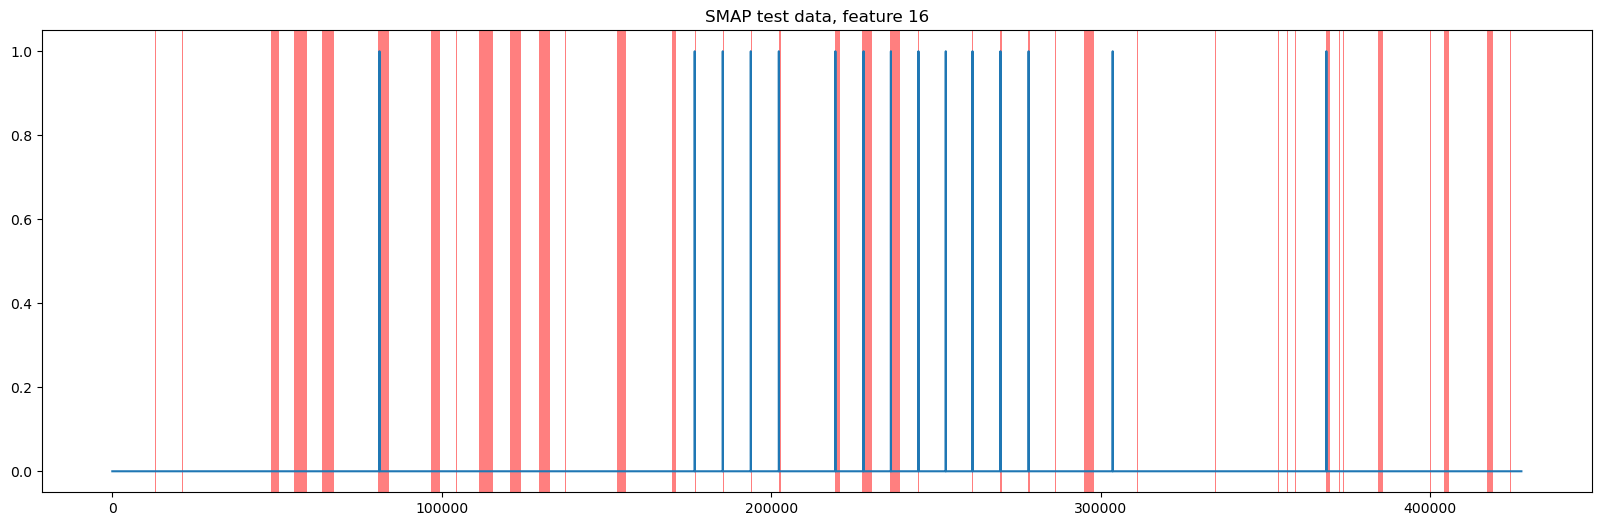

In [41]:
#config
F = 16
dataset = "SMAP"

#plot
plt.figure(figsize=(20, 6))
plt.plot(train_X[:,F])
plt.title(f"{dataset} train data, feature {F}")
plt.show()

plt.figure(figsize=(20, 6))

plt.plot(test_X[:,F])
plt.title(f"{dataset} test data, feature {F}")
s, e = None, None
for i in range(len(test_X)):
    if test_y[i] == 1 and s is None:
        s = i
    elif test_y[i] == 0 and s is not None:
        e = i-1
        plt.axvspan(s, e, facecolor='red', alpha=0.5)
        s, e = None, None

plt.show()